In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


test = pd.read_csv('/Users/kimdaehyeon/dacon/데이콘 Basic 해외 부동산 월세 예측 AI 경진대회/open/test.csv')
train = pd.read_csv('/Users/kimdaehyeon/dacon/데이콘 Basic 해외 부동산 월세 예측 AI 경진대회/open/train.csv')

In [2]:
# 한글 폰트 깨짐 현상 방지
import matplotlib.pyplot as plt 
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin':
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')

# 데이터 살펴보기

In [3]:
train.head() # latitude = 위도, longitude = 경도, suburb = 지역 이름

# y값은 monthlyRent(us_dollar)로 하기

,ID,propertyType,bedrooms,latitude,longitude,suburbName,distanceMetro(km),distanceAirport(km),distanceHospital(km),distanceRailway(km),area(square_meters),monthlyRent(us_dollar)
0,Train_0000,Apartment,3,28.638710,77.295822,Delhi East,0.312579,22.646032,11.726966,7.352495,83.61,307
1,Train_0001,Independent Floor,1,28.498940,77.207191,Delhi South,2.486167,13.500583,7.527761,15.877066,83.61,110
2,Train_0002,Independent Floor,3,28.714123,77.154404,Delhi North,1.528794,18.918243,17.135939,10.315737,78.97,369
3,Train_0003,Independent Floor,3,28.704330,77.149956,Other,0.967121,17.749252,16.251937,9.797817,162.58,676
4,Train_0004,Apartment,4,28.577915,77.049446,Dwarka,0.834506,4.288189,15.541840,18.179806,218.32,418


In [4]:
test.head()

,ID,propertyType,bedrooms,latitude,longitude,suburbName,distanceMetro(km),distanceAirport(km),distanceHospital(km),distanceRailway(km),area(square_meters)
0,Test_0000,Independent House,1,28.644199,77.162407,Delhi Central,0.675741,12.480545,9.653289,5.706151,55.74
1,Test_0001,Independent Floor,3,28.724508,77.087051,West Delhi,1.992787,18.799390,21.086929,15.963967,88.26
2,Test_0002,Independent Floor,3,28.672693,77.103973,West Delhi,0.678442,13.190977,15.514042,11.916831,111.48
3,Test_0003,Independent Floor,1,28.645021,77.169235,Delhi Central,0.003422,12.968327,9.448341,5.045234,59.92
4,Test_0004,Independent Floor,1,28.607435,77.289627,Delhi East,0.299808,20.878677,9.180785,7.736478,27.87


In [5]:
train.shape, test.shape

((8692, 12), (8693, 11))

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,8692.0,2.119650,0.900757,1.000000,1.000000,2.000000,3.000000,8.000000
latitude,8692.0,28.611199,0.070853,26.467743,28.563490,28.616885,28.651827,28.872597
longitude,8692.0,77.167464,0.093600,76.742523,77.102028,77.168053,77.224998,80.339027
distanceMetro(km),8692.0,0.869998,1.261337,0.002892,0.459687,0.698592,1.092694,65.866623
distanceAirport(km),8692.0,13.699359,7.926709,1.901789,11.152285,13.139656,17.225196,396.043067
distanceHospital(km),8692.0,11.373803,7.500915,0.669150,8.167231,10.922441,15.548549,387.016246
distanceRailway(km),8692.0,11.419991,7.345131,0.722023,8.075549,11.244344,15.435535,390.969378
area(square_meters),8692.0,101.990737,59.355027,9.290000,55.740000,83.610000,139.350000,882.580000
monthlyRent(us_dollar),8692.0,321.376898,230.962181,14.000000,159.000000,258.000000,393.000000,1476.000000


In [7]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,8693.0,2.113770,0.910293,1.000000,1.000000,2.000000,3.000000,6.000000
latitude,8693.0,28.609733,0.123253,19.185120,28.562906,28.616625,28.651827,28.872597
longitude,8693.0,77.167162,0.103275,73.213829,77.102043,77.168251,77.224998,80.358467
distanceMetro(km),8693.0,1.000589,11.821488,0.000692,0.456611,0.700091,1.099802,1096.479453
distanceAirport(km),8693.0,13.798970,14.210962,1.784779,10.841833,13.190977,17.194253,1109.894053
distanceHospital(km),8693.0,11.472104,14.039297,0.634508,8.104065,10.844672,15.542762,1115.621439
distanceRailway(km),8693.0,11.535317,14.041086,0.774632,7.973600,11.162929,15.526913,1123.778457
area(square_meters),8693.0,101.941383,61.574132,9.290000,55.740000,83.610000,139.350000,1440.000000


# 결측치 확인

In [8]:
# 결측치 확인
train.isnull().sum()

ID                        0
propertyType              0
bedrooms                  0
latitude                  0
longitude                 0
suburbName                0
distanceMetro(km)         0
distanceAirport(km)       0
distanceHospital(km)      0
distanceRailway(km)       0
area(square_meters)       0
monthlyRent(us_dollar)    0
dtype: int64

In [9]:
test.isnull().sum()

ID                      0
propertyType            0
bedrooms                0
latitude                0
longitude               0
suburbName              0
distanceMetro(km)       0
distanceAirport(km)     0
distanceHospital(km)    0
distanceRailway(km)     0
area(square_meters)     0
dtype: int64

#### 결측치 처리는 없어도 됌.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      8692 non-null   object 
 1   propertyType            8692 non-null   object 
 2   bedrooms                8692 non-null   int64  
 3   latitude                8692 non-null   float64
 4   longitude               8692 non-null   float64
 5   suburbName              8692 non-null   object 
 6   distanceMetro(km)       8692 non-null   float64
 7   distanceAirport(km)     8692 non-null   float64
 8   distanceHospital(km)    8692 non-null   float64
 9   distanceRailway(km)     8692 non-null   float64
 10  area(square_meters)     8692 non-null   float64
 11  monthlyRent(us_dollar)  8692 non-null   int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 815.0+ KB


In [11]:
# ID, propertyType, suburbName = object
# 나머지는 int, float

In [12]:
# 각 데이터들의 unique 값 살펴보기
train['propertyType'].unique()

array(['Apartment', 'Independent Floor', 'Independent House', 'Villa'],
      dtype=object)

In [13]:
train['suburbName'].unique()

array(['Delhi East', 'Delhi South', 'Delhi North', 'Other', 'Dwarka',
       'West Delhi', 'Delhi Central', 'North Delhi', 'South West Delhi',
       'Delhi West', 'Rohini', 'North West Delhi'], dtype=object)

In [14]:
# 데이터를 살펴보기 전 가설을 설정해보자
# 1. 델리의 중심부부터 멀어지면 가격이 떨어지지 않을까? => 연속형 x 연속형?
# => 중심부의 위도와 경도를 찾아내어 비교해보자
# 2. 공항, 은행, 병원, 지하철에서부터 가까우면 가격이 높지 않을까? => 연속형 x 연속형
# 3. propertyType에 따라 가격이 달라지지 않을까 => 범주형 x 연속형

In [15]:
# 데이터에서 예측하고자 하는 타겟 y변수가 있기에, 타겟값부터 분석
train['monthlyRent(us_dollar)'].describe()

# 해석
# 평균 321달러, 최솟값 = 14달러, 최대값 = 1476달러
# 차이가 좀 있음, outlier 살펴보기

count    8692.000000
mean      321.376898
std       230.962181
min        14.000000
25%       159.000000
50%       258.000000
75%       393.000000
max      1476.000000
Name: monthlyRent(us_dollar), dtype: float64

/var/folders/k8/sgcmzprx7qx4jhg9khnv7wd80000gn/T/ipykernel_53102/490503661.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist = sns.distplot(train['monthlyRent(us_dollar)'])


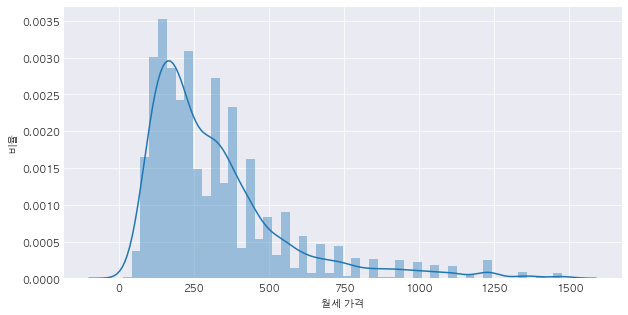

In [16]:
# distplot으로 살펴보자
plt.figure(figsize = (10,5))

dist = sns.distplot(train['monthlyRent(us_dollar)'])
dist.set_xlabel('월세 가격')
dist.set_ylabel('비율')

plt.show()

# 100 ~ 250달러에 매우 몰려있음
# 1250달러에 살짝 모여있음.

In [17]:
#skewness(= 왜도) and kurtosis(= 첨도)
train['monthlyRent(us_dollar)'].skew()
train['monthlyRent(us_dollar)'].kurt()

# 정규분포와 살짝 유사한 형태
# 왜도정도가 있음
# 첨도는 조금 뾰족함

4.595740899347671

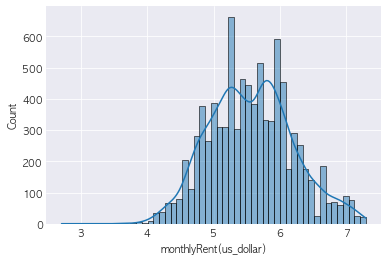

In [18]:
# 종속변수가 정규분포를 따르지 않으면 회귀 예측 성능이 저하됌.
# 종속변수를 정규분포 형태로 바꾸기 위해 로그 변환을 해보자
sns.histplot(np.log1p(train['monthlyRent(us_dollar)']), kde=True)
plt.show()

# 정규분포와 유사하게 바뀜
# 왜곡 완화
# 로그변환을 한 후 진행해보자

In [19]:
# y 변수 따로 빼내기 
y = train['monthlyRent(us_dollar)']

In [1]:
# 아까 설정했던 가설 중 1번
# 델리의 중심부부터 멀어지면 가격이 떨어지지 않을까?
# 위도의 경도의 차이를 절댓값으로 더했을 때 합계가 크면 중심부로부터 멀어짐
# y축을 월세, x축을 중심부부터 멀어진 거리

# 델리의 위도, 경도 = [28.61, 77.23]
train['la+lo'] = round(abs(train['latitude'] - 28.61) + abs(train['longitude'] - 77.23),3)

train = train.sort_values(['la+lo'])
train.tail(5)

# 마지막 데이터 2개는 너무 크기 때문에 제외하고 진행
train_2 = train.drop([6988,8272])

# plt 그리기
plt.figure(figsize = (10,5))

train_2.plot.scatter(x = 'la+lo', y = 'monthlyRent(us_dollar)')
plt.xticks([0,0.25])

plt.show()

# 위도+경도 차이가 0 ~ 0.25면 월세가 높음.
# 0.25부터 0.5까지는 월세가 그리 비싸지 않다.
# => 중심부로부터 멀수록 월세가 싸다.

NameError: name 'train' is not defined

In [ ]:
# 2. 공항, 은행, 병원, 지하철에서부터 가까우면 가격이 높지 않을까? => 연속형 x 연속형
# 공항, 은행, 병원, 지하철의 거리를 다 더해서 비교 해보자 
# 넷 다 가까울수록 월세가 비쌀거라 예상
train['sum_gg'] = round(train['distanceMetro(km)'] + train['distanceAirport(km)'] \
                + train['distanceHospital(km)'] + train['distanceRailway(km)'],3)
train['sum_gg'].describe()
train = train.sort_values(['sum_gg'])
train.tail(5)

# 6988,8272는 숫자가 너무 크기에 삭제
train_3 = train.drop([6988, 8272])

# plt 그리기
plt.figure(figsize = (10,5))

train_3.plot.scatter(x = 'sum_gg', y = 'monthlyRent(us_dollar)')

plt.show()

# 마찬가지로 거리가 20 ~ 55km 대에 월세가 매우 높음
# 55달러를 지나고 나서 부터 월세가 떨어짐

In [ ]:
# 데이터 스케일링
# 범주형 제외한 나머지 변수들 스케일링 해주자
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_col = ['bedrooms', 'latitude', 'longitude', 'distanceMetro(km)','distanceAirport(km)', 'distanceHospital(km)', 'distanceRailway(km)','area(square_meters)']
train[scale_col] = scaler.fit_transform(train[scale_col]) 

In [ ]:
# 3. propertyType에 따라 가격이 달라지지 않을까 => 범주형 x 연속형
plt.figure(figsize = (10,5))

cnt = sns.boxplot(x = 'propertyType', y = 'monthlyRent(us_dollar)', data = train, 
                   palette = 'Set3')
cnt.set_xlabel('propertyType')
cnt.set_ylabel('dollar')

plt.show()

# 빌라 가격이 평균적으로 높다.
# 이상치가 존재

In [20]:
# 이상치 없애기

In [ ]:
# 이상치 제거 전 알파벳 순서대로 properType 정리
train = train.sort_values(['propertyType'])

In [ ]:
# 행 위치 확인하기
print(len(train[train['propertyType'] == 'Apartment'])) # 0 : 2836
print(len(train[train['propertyType'] == 'Independent Floor'])) # 2836 : 8275
#print(len(train[train['propertyType'] == 'Independent House'])) # 8275 : 8681

In [ ]:
# propertyType 중 Apartment, Independent Floor, Independent House 이상치를 제거할 거임
q3_apart = train[train['propertyType'] == 'Apartment']['monthlyRent(us_dollar)'].quantile(0.75)
q1_apart = train[train['propertyType'] == 'Apartment']['monthlyRent(us_dollar)'].quantile(0.25)
q3_floor = train[train['propertyType'] == 'Independent Floor']['monthlyRent(us_dollar)'].quantile(0.75)
q1_floor = train[train['propertyType'] == 'Independent Floor']['monthlyRent(us_dollar)'].quantile(0.25)
q3_house = train[train['propertyType'] == 'Independent House']['monthlyRent(us_dollar)'].quantile(0.75)
q1_house = train[train['propertyType'] == 'Independent House']['monthlyRent(us_dollar)'].quantile(0.25)


# IQR 방식
# minimum은 없으니 maximum만
apart_up = q3_apart + 1.5*(q3_apart - q1_apart)
floor_up = q3_floor + 1.5*(q3_floor - q1_floor)
house_up = q3_house + 1.5*(q3_house - q1_house)

# 이상치 대체는 상한값
for i in range(0, len(train[train['propertyType'] == 'Apartment'])) :
    if train['monthlyRent(us_dollar)'].values[i] > apart_up :
        train['monthlyRent(us_dollar)'].values[i] = apart_up
    else : 
        pass

for i in range(len(train[train['propertyType'] == 'Apartment']), len(train[train['propertyType'] == 'Apartment']) + len(train[train['propertyType'] == 'Independent Floor'])) :
    if train['monthlyRent(us_dollar)'].values[i] > floor_up :
        train['monthlyRent(us_dollar)'].values[i] = floor_up
    else : 
        pass
    
for i in range(len(train[train['propertyType'] == 'Apartment']) + len(train[train['propertyType'] == 'Independent Floor']), len(train[train['propertyType'] == 'Apartment']) + len(train[train['propertyType'] == 'Independent Floor']) +len(train[train['propertyType'] == 'Independent House'])):
    if train['monthlyRent(us_dollar)'].values[i] > house_up :
        train['monthlyRent(us_dollar)'].values[i] = house_up
    else : 
        pass


In [ ]:
# 이상치가 사라졌는지 확인하기
plt.figure(figsize = (10,5))

cnt = sns.boxplot(x = 'propertyType', y = 'monthlyRent(us_dollar)', data = train, 
                   palette = 'Set3')
cnt.set_xlabel('propertyType')
cnt.set_ylabel('dollar')

plt.show()

# 이상치 다 사라짐

In [21]:
# train,test 에 ID, 위도, 경도, distance, dollar 드랍 시키고 거리 합으로 모델 돌려보기
#train_drop = train.drop(columns = ['ID','latitude', 'longitude', 'distanceMetro(km)','distanceAirport(km)',
                              #'distanceHospital(km)', 'distanceRailway(km)','monthlyRent(us_dollar)'])
#test_drop = test.drop(columns = ['ID','latitude', 'longitude', 'distanceMetro(km)','distanceAirport(km)',
                              #'distanceHospital(km)', 'distanceRailway(km)'])

# train과 test에 있던 la+lo, sum_gg 없애기
train_drop = train.drop(columns = ['ID', 'monthlyRent(us_dollar)'])
test_drop = test.drop(columns = ['ID'])

# one-hot encoding

In [22]:
# one - hot encoding
train_drop_dum = pd.get_dummies(train_drop)
test_drop_dum = pd.get_dummies(test_drop)

In [23]:
# 데이터 나누고 학습시키기
from sklearn.model_selection import train_test_split

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(train_drop_dum, y, \
                                                   test_size = 0.2)

In [ ]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['columns'] = X_TRAIN.columns
vif["VIF"] = [variance_inflation_factor(X_TRAIN.values, i) for i in range(X_TRAIN.shape[1])]
vif.round(1)

In [24]:
# modeling
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 100, max_depth = 3)
model.fit(X_TRAIN, Y_TRAIN)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

from sklearn.linear_model import Ridge
model = Ridge(alpha = 0.25)
model.fit(X_TRAIN, Y_TRAIN)

In [25]:
y_test_predicted = model.predict(test_drop_dum)

In [26]:
submit = pd.read_csv('/Users/kimdaehyeon/dacon/데이콘 Basic 해외 부동산 월세 예측 AI 경진대회/open/sample_submission.csv')

In [27]:
submit['monthlyRent(us_dollar)'] = y_test_predicted
submit.head()

,ID,monthlyRent(us_dollar)
0,Test_0000,180.074173
1,Test_0001,239.271393
2,Test_0002,332.610809
3,Test_0003,193.907959
4,Test_0004,91.812859


In [28]:
submit.to_csv('./submit.csv', index=False)

In [29]:
Y_TEST_predicted = model.predict(X_TEST)

In [30]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(Y_TEST, Y_TEST_predicted) 
np.sqrt(MSE)

104.77353187033206

In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_TEST, Y_TEST_predicted)
print(r2)

0.8133235351829345


### 첫 데이터 분석이다보니 여러가지를 해보고 싶었음
### 내가 정한 여러가지 가설들을 두고 결과들도 확인해보고 싶었음
### 하지만 좀 미숙한 점들을 많이 발견함
### 다음에는 더 확실하게 공부해서 여러 가지들을 더 살펴보고 싶음